

# Snow Water Equivalent EDA

## Import Packages & Mount

In [1]:
!pip install geopandas
!pip install Basemap
!pip install h5py
!pip install seaborn

In [2]:
# Import Packages
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.basemap import Basemap
import copy

In [3]:
# Change Directory
import os
os.chdir('data/')
os.listdir()

['SN_SWE_WY2015.h5',
 '.ipynb_checkpoints',
 '2015_day1.npy',
 '2015_day2.npy',
 '2015_day3.npy',
 '2015_day4.npy',
 '2015_day5.npy',
 '2015_day6.npy',
 '2015_day7.npy']

## Read Data

In [4]:
# Read data
data = h5py.File('SN_SWE_WY2015.h5', 'r')
## Check keys
data.keys()

<KeysViewHDF5 ['SWE', 'lat', 'lon']>

## Data Info

In [6]:
### Check SWE
print(data['lon'])
print(data['lat'])
print('-------------')
print('Longitutude Range: [{},{}]'.format(min(data['lon'])[0],max(data['lon'])[0]))
print('Latitude Range: [{},{}]'.format(min(data['lat'][0]),max(data['lat'][0])))


<HDF5 dataset "lon": shape (5701, 1), type "<f8">
<HDF5 dataset "lat": shape (1, 6601), type "<f8">
-------------
Longitutude Range: [-123.3,-117.6]
Latitude Range: [35.4,42.0]


In [130]:
6*69

414

In [6]:
# Longtitude & Latitude
print((-117.6 +123.3)/5701*69*1.6)
print((42-35.4)/6601*69*1.6)
# There is a value associated for every 0.11km x 0.11km region

0.11038063497632
0.11038327526132406


## **SWE EDA**

In [7]:
# Dimension of SWE: 365 days x 5701 (lon) x 6601 (lat)
data['SWE'] 

<HDF5 dataset "SWE": shape (365, 5701, 6601), type "<i2">

## Analysis on First day of 2015

#### Convert to Tabular Data: Lat & Lon

#### Map Plot

In [11]:
## Meshgrid
lats,lons = np.meshgrid(data['lat'],data['lon'])

In [27]:
data['SWE'][0].shape
swe = data['SWE'][0]

### Sample some of Datapoints
- Dataset consists 5701 (longitude) x 6601 (latitude) values. 

- Due to resource limitation, we will only sample and plot 1/5 of the datapoints, which will be 1141x1321.

In [9]:
### Sample Data

def subsample(lats,lons,values):
    factor = 5

    new_lats =  np.zeros((5701//factor+1,6601//factor+1))
    new_lons = np.zeros((5701//factor+1,6601//factor+1))
    new_swe = np.zeros((5701//factor+1,6601//factor+1))
    ii = 0 
    final_list = []
    for i in range(0,lats.shape[0],factor):
        jj = 0
        for j in range(0,lats.shape[1],factor):
            new_lats[ii,jj] = lats[i,j]
            new_lons[ii,jj] = lons[i,j]
            new_swe[ii,jj] = values[i,j]
            final_list.append([lats[i,j],lons[i,j],values[i,j]])
            jj += 1
        ii += 1
        
    return new_lats,new_lons,new_swe,final_list


In [27]:
# New data shape
new_lats,new_lons,new_swe,final_list = subsample(lats,lons,data['SWE'][0])
new_lats.shape

(1141, 1321)

### Distribution

In [54]:
# Unique Values inside day0
print('Number of unique values:',len(np.unique(swe)))
np.unique(swe,return_counts=True)

Number of unique values: 405


(array([-32768,      0,      1,      2,      3,      4,      5,      6,
             7,      8,      9,     10,     11,     12,     13,     14,
            15,     16,     17,     18,     19,     20,     21,     22,
            23,     24,     25,     26,     27,     28,     29,     30,
            31,     32,     33,     34,     35,     36,     37,     38,
            39,     40,     41,     42,     43,     44,     45,     46,
            47,     48,     49,     50,     51,     52,     53,     54,
            55,     56,     57,     58,     59,     60,     61,     62,
            63,     64,     65,     66,     67,     68,     69,     70,
            71,     72,     73,     74,     75,     76,     77,     78,
            79,     80,     81,     82,     83,     84,     85,     86,
            87,     88,     89,     90,     91,     92,     93,     94,
            95,     96,     97,     98,     99,    100,    101,    102,
           103,    104,    105,    106,    107,    108,    109, 

Text(0, 0.5, 'Frequency')

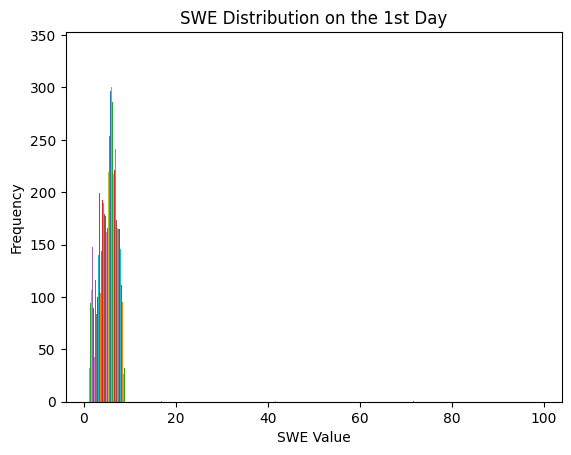

In [32]:
plt.hist(new_swe,range = (0,100))
plt.title('SWE Distribution on the 1st Day')
plt.xlabel('SWE Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

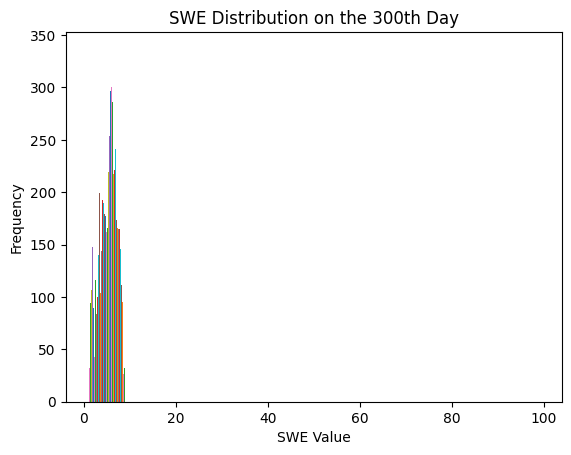

In [35]:
lats100,lons100,swe100,final_list100 = subsample(lats,lons,data['SWE'][299])
plt.hist(swe100,range = (0,100))
plt.title('SWE Distribution on the 300th Day')
plt.xlabel('SWE Value')
plt.ylabel('Frequency')

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <a list of 1321 BarContainer objects>)

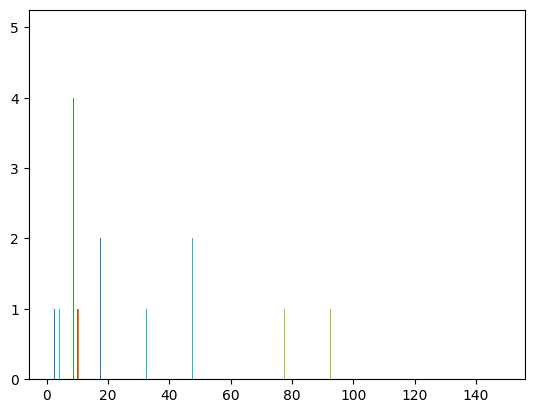

In [83]:
import copy
new_swe_copy = copy.deepcopy(new_swe)
plt.hist(new_swe,range = (0,150))

### Plots

In [88]:
new_swe[new_swe <0] = np.nan

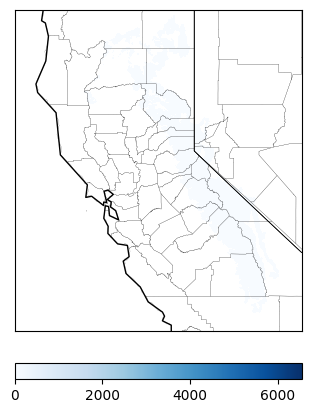

In [141]:
# Longitutude Range: [-123.3,-117.6]   -- Latitude Range: [35.4,42.0]
mp = Basemap(projection = 'merc',
             llcrnrlon = -125,
             llcrnrlat = 35,
             urcrnrlon = -117,
             urcrnrlat = 42,
             resolution = 'l')

x,y= mp(new_lons,new_lats)

cs = mp.pcolor(x,y,new_swe,cmap= 'Blues')
cbar = mp.colorbar(cs,location = 'bottom',pad = '10%')

mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawcounties()

In [100]:
### Plotting
# Replace 0 with nans
# Convert Numpy Array to Pandas DataFrame
final_pd = pd.DataFrame(final_list,columns = ['lat','lon','SWE'])


In [102]:
final_pd[final_pd['SWE']>0].reset_index(drop=True).head(15)

,lat,lon,SWE
0,41.270,-122.505,1
1,41.370,-122.235,1
2,41.390,-122.230,18
3,41.400,-122.225,89
4,41.395,-122.225,9
5,41.390,-122.225,28
6,41.385,-122.225,17
7,41.405,-122.220,59
8,41.400,-122.220,88
9,41.395,-122.220,92


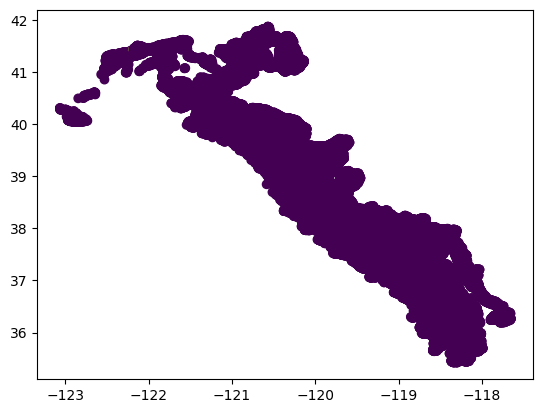

In [69]:
# Replace -32768 with nans
# nonzero_pd = final_pd.copy(deep=True)
final_pd['none_zero_value'] = final_pd['value'].replace({-32768:np.nan})
plt.scatter(x=final_pd['lon'],y=final_pd['lat'],c=final_pd['none_zero_value'])

In [29]:
# Convert greater than 4 to np.nan
new_swe[new_swe<4] = np.nan

In [30]:
np.unique(new_swe,return_counts=True)

(array([4.000e+00, 5.000e+00, 6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
        1.000e+01, 1.100e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
        1.700e+01, 1.800e+01, 2.100e+01, 2.200e+01, 2.300e+01, 2.500e+01,
        2.600e+01, 2.800e+01, 3.000e+01, 3.200e+01, 3.600e+01, 4.200e+01,
        4.300e+01, 4.600e+01, 4.900e+01, 5.500e+01, 5.900e+01, 6.200e+01,
        6.300e+01, 6.400e+01, 6.500e+01, 7.400e+01, 7.500e+01, 7.800e+01,
        8.000e+01, 8.100e+01, 8.200e+01, 8.300e+01, 8.500e+01, 8.800e+01,
        8.900e+01, 9.100e+01, 9.200e+01, 9.300e+01, 9.400e+01, 9.500e+01,
        9.600e+01, 1.000e+02, 1.040e+02, 1.190e+02, 1.230e+02, 1.340e+02,
        1.370e+02, 4.150e+02, 1.887e+03, 3.320e+03, 5.075e+03, 5.644e+03,
        6.093e+03, 6.473e+03, 6.498e+03, 6.553e+03,       nan]),
 array([     19,      15,       9,       7,       3,       8,       3,
              1,       3,       3,       1,       2,       2,       1,
              2,       1,       1,       1,       3, 

### Plot Value which are greater than 4

In [147]:
new_lats[new_swe>100],new_lons[new_swe>100]

(array([41.42 , 41.415, 41.41 , 41.425, 41.42 , 41.415, 41.41 , 41.405,
        41.42 , 41.415, 41.405, 37.245]),
 array([-122.19 , -122.19 , -122.19 , -122.185, -122.185, -122.185,
        -122.185, -122.185, -122.18 , -122.18 , -122.18 , -118.655]))

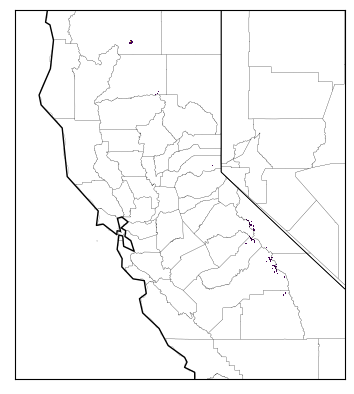

In [46]:
### BASEMAP
mp = Basemap(projection = 'merc',
             llcrnrlon = -125,
             llcrnrlat = 35,
             urcrnrlon = -117,
             urcrnrlat = 42,
             resolution = 'l')

x,y= mp(new_lons,new_lats)

cs = mp.pcolor(x,y,new_swe,cmap= 'viridis')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
mp.drawcounties()

In [49]:
# Add new SWE value inside dataframe
final_pd['new_value'] = pd.Series(new_swe.reshape(new_swe.shape[0]*new_swe.shape[1]))
# Scatter Plot on values greater than 4
sc = plt.scatter(final_pd['lon'],y=final_pd['lat'],c=final_pd['new_value'])

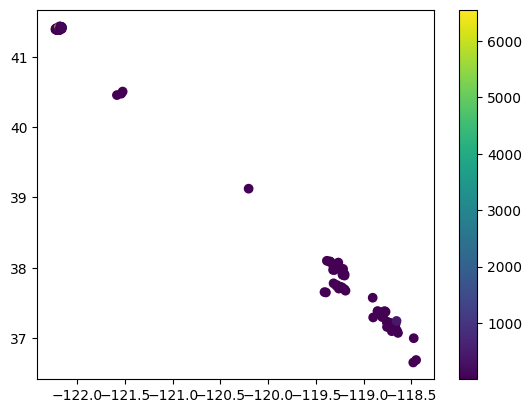

In [50]:
## Plot Graph
plt.colorbar(sc)

## Histogram on Distribution Over 7 Days

---- Working on Plot Day 1 ----
---- Working on Plot Day 2 ----
---- Working on Plot Day 3 ----
---- Working on Plot Day 4 ----
---- Working on Plot Day 5 ----
---- Working on Plot Day 6 ----
---- Working on Plot Day 7 ----


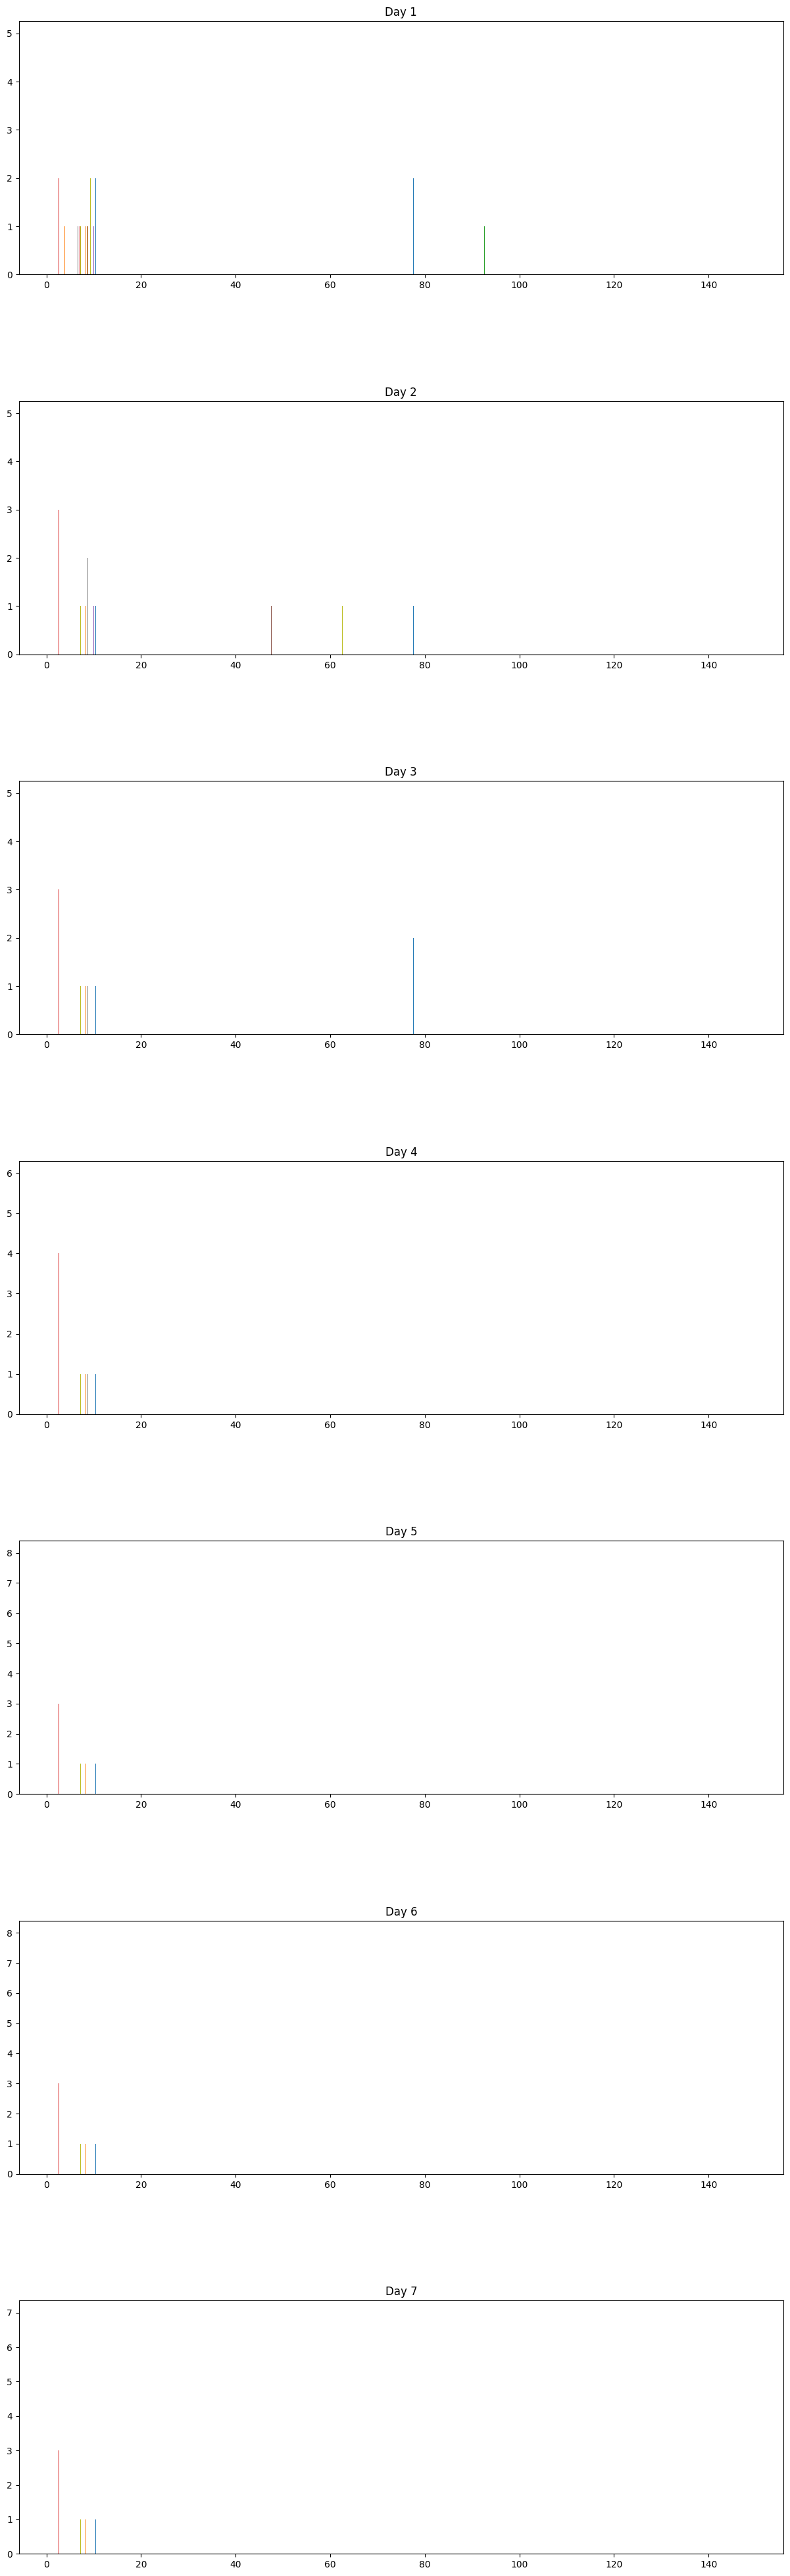

In [126]:
num_days = 7

plt.figure(figsize=(15,50))
for i in range(num_days):
    print('---- Working on Plot Day {} ----'.format(i+1))
    # swe = data['SWE'][i]
    # # Sample 1/5 of the datapoints
    # new_lats,new_lons,new_swe,final_list = subsample(lats,lons,swe)
    # # Save Numpy Array
    # np.save(f'2015_day{i+1}.npy',new_swe)
    
    new_swe = np.load(f'2015_day{i+1}.npy')
    
    # Convert negatives and 0s to np.nan
    new_swe[new_swe<1] = np.nan

    plt.subplot(num_days,1,i+1)
    plt.hist(new_swe,range = (0,150))
    plt.title('Day {}'.format(i+1))
    plt.subplots_adjust(hspace=0.5)

## 100th day

In [13]:
swe100 = data['SWE'][99]
lat100,lon100,swe100,final_list100 = subsample(lats,lons,swe100)

In [14]:
swe100.shape

(1141, 1321)

In [15]:
swe100[swe100<0] = np.nan
swe100[swe100>500] = np.nan

/tmp/ipykernel_76/2203214642.py:11: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  cs = mp100.pcolor(x,y,swe100)


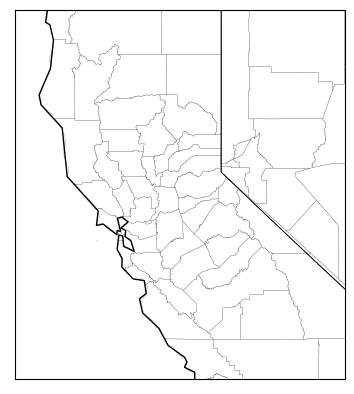

In [18]:
### BASEMAP
mp100 = Basemap(projection = 'merc',
             llcrnrlon = -125,
             llcrnrlat = 35,
             urcrnrlon = -117,
             urcrnrlat = 42,
             resolution = 'l')

x,y= mp100(lat100,lon100)

cs = mp100.pcolor(x,y,swe100)
mp100.drawcoastlines()
mp100.drawstates()
mp100.drawcountries()
mp100.drawcounties()

In [17]:
np.unique(swe100,return_counts=True)

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

/tmp/ipykernel_498/1873868723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(swe100)


<AxesSubplot:ylabel='Density'>

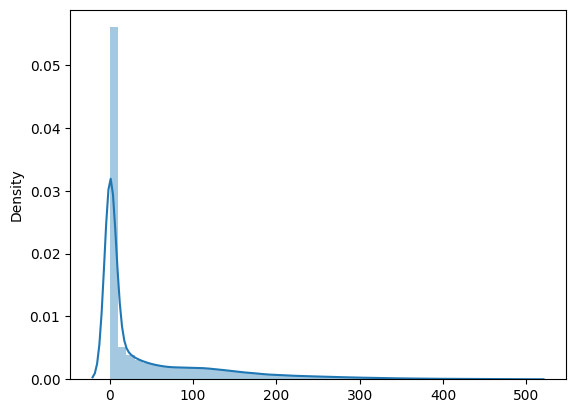

In [33]:
import seaborn as sns
sns.distplot(swe100)

In [35]:
lat100[swe100>1], lon100[swe100>1]

(array([40.295, 40.29 , 40.295, ..., 36.585, 36.58 , 36.555]),
 array([-123.065, -123.065, -123.06 , ..., -117.83 , -117.83 , -117.805]))

## Find data point closest to # 39.9927° N, -120.8039° W

In [5]:
### Find Data value that's closest to 39.9927°, -120.8039°
def find_index(lon,lat):
    
    ### Find Lon
    maxx = 100
    lon_idx = 0
    for i in range(len(data['lon'])):
        dist = abs(data['lon'][i][0] - lon)
        if dist < maxx:
            maxx = dist
            lon_idx = i
    print('Longitude Index:',lon_idx)
    print('Longitude Value:',data['lon'][lon_idx][0])
    
    ### Find Lat
    maxx = 100
    lat_idx = 0
    for i in range(len(data['lat'][0])):
        dist = abs(data['lat'][0][i] - lat)
        if dist < maxx:
            maxx = dist
            lat_idx = i
    print('Latitude Index:',lat_idx)
    print('Latitude Value:',data['lat'][0][lat_idx])
    
    return lon_idx,lat_idx


In [6]:
lon_idx,lat_idx = find_index(-120.8039,39.9927)

Longitude Index: 2496
Longitude Value: -120.804
Latitude Index: 2007
Latitude Value: 39.993


In [7]:
l = []
for i in range(0,365,10):
    print('Day',i)
    print(data['SWE'][i][lon_idx-5:lon_idx+5,lat_idx-5:lat_idx+5])
    print('-------------')

Day 0
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
-------------
Day 10
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
-------------
Day 20
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
-------------
Day 30
[[0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
-------

In [19]:
### Snow Water Equivalent Value for 39.9927° N, -120.8039° E over 2015
l = []
for i in range(0,365):
    #print('Day',i)
    l.append(data['SWE'][i][lon_idx,lat_idx])
    #print(data['SWE'][i][lon_idx,lat_idx])
    #print('-------------')

Text(0.5, 1.0, 'Snow Water Equivalent of Year 2015 on One Water Gage')

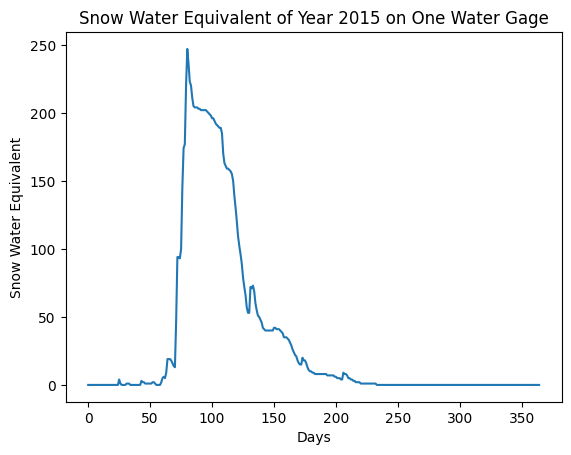

In [26]:
## Plot
days = [i for i in range(365)]
plt.plot(days,l)
plt.xlabel('Days')
plt.ylabel('Snow Water Equivalent')
plt.title('Snow Water Equivalent of Year 2015 on One Water Gage')

In [82]:
l

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 5,
 6,
 5,
 9,
 19,
 19,
 19,
 18,
 16,
 14,
 13,
 47,
 94,
 94,
 93,
 100,
 145,
 174,
 177,
 220,
 247,
 236,
 223,
 220,
 211,
 205,
 204,
 204,
 204,
 203,
 203,
 202,
 202,
 202,
 202,
 202,
 201,
 200,
 199,
 198,
 196,
 196,
 194,
 192,
 191,
 190,
 189,
 189,
 185,
 170,
 163,
 161,
 159,
 159,
 158,
 157,
 155,
 150,
 139,
 130,
 120,
 109,
 102,
 96,
 89,
 79,
 72,
 66,
 57,
 53,
 53,
 72,
 71,
 73,
 69,
 60,
 55,
 51,
 50,
 48,
 46,
 42,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 42,
 42,
 41,
 41,
 41,
 40,
 39,
 38,
 35,
 35,
 35,
 34,
 33,
 31,
 29,
 26,
 24,
 22,
 21,
 18,
 16,
 15,
 15,
 20,
 18,
 18,
 16,
 13,
 11,
 10,
 10,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 5,
 5,
 5,
 4,
 4,
 9,
 8,
 8,